## computer vision libraries in PyTorch


* `torchvision`	Contains datasets, model architectures and image transformations often used for computer vision problems.
* `torchvision.datasets`	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.
* `torchvision.models`	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.
* `torchvision.transforms`	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.
* `torch.utils.data.Dataset`	Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


# 1.0. Getting our dataset

The dataset we will be utilising is FashionMNIST from torchvisions.datasets -
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training datasets
    download=True, # do we want to download it?
    transform= torchvision.transforms.ToTensor(), # transform the data to tensor(images to numbers)
    target_transform=None # how do we want to transform the data
)

testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)



100%|██████████| 26421880/26421880 [00:03<00:00, 7287423.21it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270505.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4949520.50it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4841317.71it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(testing_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image ,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"Image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image shape:{class_names[label]}")

Image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image shape:Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

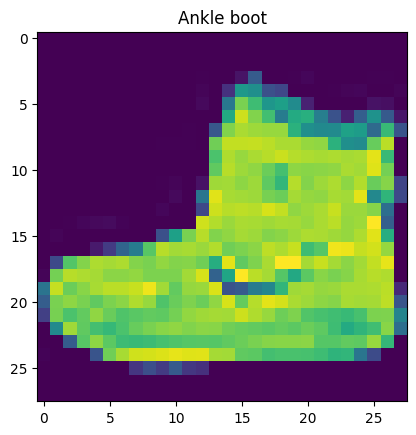

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

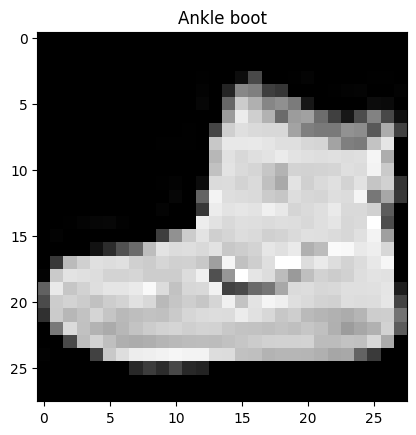

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

30475
50329
31733
49564
49739
52376
59632
50010
8186
9822
21577
27519
31707
8123
12143
25294


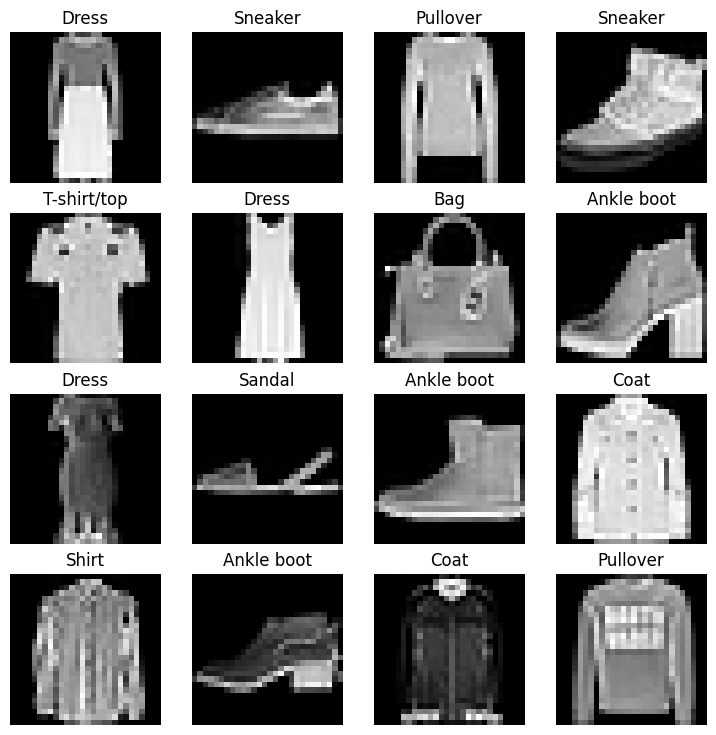

In [ ]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols =4, 4
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(rand_idx)
  img, label = train_data[rand_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)